# Atelier de modélisation du métabolisme

### Maxime Mahout

## 1) Qu'est-ce que le métabolisme ?

L'ensemble des réactions qui se déroulent au sein d'une cellule (source image: Wikipedia).

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Metabolic_Metro_Map.svg/800px-Metabolic_Metro_Map.svg.png)

### → Réseaux métaboliques:
* noeuds: métabolites
* arêtes: réaction
* pondération: stoechiométrie

\begin{equation}
\text{ex: } 2~ADP \rightarrow ATP + AMP
\end{equation}

## 2) Qu'est-ce qu'un modèle du métabolisme ?

Exemple: Mahout, Schwartz, Attal, Bakkar, Peres, 2024:

https://doi.org/10.1371/journal.pone.0313962

![img](https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0313962.g007)

Un modèle en sciences est une réduction d'un objet réel en une maquette que l'on peut analyser pour faire des prédictions que l'on espère avérées sur cet objet réel.

Ici, par exemple nous faisons des hypothèses sur la formation du stroma tumoral à partir d'un modèle réduit du métabolisme principal de la cellule cancéreuse.

## 3) Pourquoi modéliser le métabolisme ?

Comme en bio-statistique, on utilise les modèles afin de répondre à des questions scientifiques pour lesquelles on a formulé des hypothèses.

Egalement nous pouvons partir dépourvus d'une hypothèse et tester des propriétés sur des modèles pré-existants en espérant faire émerger des découvertes.


## 4) Comment modéliser le métabolisme ?

Il existe plusieurs façons de modéliser le métabolisme et sa complexité. Nous pouvons utiliser des approches 1) dynamiques ou 2) à l'état stationnaire pour modéliser les réactions biochimiques.

Les méthodes à l'état stationnaire, c'est à dire où la concentration en métabolite ne varie pas au cours du temps, telles que Flux Balance Analysis, sont les plus faciles d'accès.

Plus globalement afin d'obtenir des prédictions précises les modèles doivent respecter les principes de la "biologie des systèmes", une science qui s'attèle à représenter le système biologique dans toute sa complexité.

Autrement dit, le modèle biologique doit pouvoir intégrer le système "cellule" à travers tous ses niveaux: gène, ADN, ARN, molécules, chimie, protéine, enzyme, lipides, etc. et pourra être confirmé par tout autant d'analyses, génomique, transcriptomique, protéomique, métabolomique, etc. cf. https://www.nature.com/articles/nrm1857

## 5) Avec quelle méthode commencer ?

Je préconise la méthode "[Flux Balance Analysis](https://doi.org/10.1038/nbt.1614)" (FBA) et de partir "hypothesis-free" sur des modèles "à l'échelle du génome" préexistants, tels que ceux présents sur la base de données [BiGG](http://bigg.ucsd.edu/). Un modèle dit à l'échelle du génome est reconstruit à partir d'un génome et associe gènes aux réactions.

Afin de tester cela, nous pouvons installer l'outil `cobrapy` [(documentation)](https://cobrapy.readthedocs.io/) et tester le modèle par défaut `e_coli_core` (cf. [reference](https://europepmc.org/article/med/26443778)). 

Nous utiliserons `escher` [(documentation)](https://escher.readthedocs.io/en/latest/escher-python.html) pour la visualisation des réseaux métaboliques.

In [1]:
!pip list | grep -e "cobra" -e "Escher"

cobra                    0.26.2
Escher                   1.7.3


In [2]:
!jupyter nbextension list

Known nbextensions:
  config dir: /home/maxime/anaconda3/envs/escher-viz/etc/jupyter/nbconfig
    notebook section
      escher/extension  enabled 
      - Validating: OK
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
  config dir: /home/maxime/.jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
  config dir: /home/maxime/.local/etc/jupyter/nbconfig
    notebook section
      nbextensions_configurator/config_menu/main  enabled 
      - Validating: problems found:
        - require?  X nbextensions_configurator/config_menu/main
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
    tree section
      nbextensions_configurator/tree_tab/main  enabled 
      - Validating: problems found:
        - require?  X nbextensions_configurator/tree_tab/main
  config dir: /etc/jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      - Validating: OK


Remarquer ici que l'extension escher/extension pour les Jupyter notebooks est activée.

## 6) Visualisons un modèle métabolique

Le modèle `e_coli_core` est un modèle simplifié du métabolisme central de la bactérie *Escherichia coli*.

Il possède 72 metabolites, 95 réactions, et a été reconstruit depuis le génome à partir de 137 gènes.

In [3]:
import escher
from escher import Builder
import cobra

In [4]:
!wget -nc http://bigg.ucsd.edu/static/models/e_coli_core.json
!wget -nc http://bigg.ucsd.edu/static/models/e_coli_core.xml

Fichier «e_coli_core.json» déjà présent ; pas de récupération.

Fichier «e_coli_core.xml» déjà présent ; pas de récupération.



In [5]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [6]:
builder

Builder()

La croissance de la bactérie est modélisée par une réaction appelée `BIOMASS_Ecoli_core`, réaction de synthèse de la biomasse. Cette réaction est calculée afin que son flux en métabolites soit plus ou moins proportionnelle au taux de croissance expérimental.

Ce modèle est donc adapté pour la méthode Flux Balance Analysis (FBA), c'est à dire l'analyse à l'état stationnaire des flux du réseau de réactions, à l'aide d'une optimisation linéaire avec comme fonction objective la croissance de la cellule.

In [102]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [103]:
model

Name,e_coli_core
Memory address,7fc2b6bb4400
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


## 7) Visualisons l'effet d'une mutation d'un gène sur le métabolisme

### a) Quel taux de croissance pour la bactérie *E. coli* wild type ?

In [7]:
from copy import copy

In [8]:
growth_rates = {}

In [ ]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [10]:
fluxes = model.optimize()

In [11]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [12]:
builder.reaction_data = fluxes.fluxes

In [13]:
builder

Builder(reaction_data={'PFK': 7.477381962160285, 'PFL': 0.0, 'PGI': 4.860861146496822, 'PGK': -16.023526143167…

In [14]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.8739215069684302

In [15]:
growth_rates['WT'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

Le taux de croissance simulé de la bactérie *E. coli* WT est de ~ 0.873 h⁻¹.

### b) Quel taux de croissance pour la bactérie *E. coli* avec knock-out du gène *pgi* ?

Voir la fiche UniProt: https://www.uniprot.org/uniprotkb/P0A6T1/entry.

In [16]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [17]:
model.reactions.get_by_id('PGI') # bounds (-1000.0, 1000.0)

Reaction identifier,PGI
Name,Glucose-6-phosphate isomerase
Memory address,0x7fc2eda64790
Stoichiometry,g6p_c <=> f6p_c D-Glucose 6-phosphate <=> D-Fructose 6-phosphate
GPR,b4025
Lower bound,-1000.0
Upper bound,1000.0


In [18]:
for gene in list(model.reactions.get_by_id('PGI').genes):
    gene.knock_out() # b4025

In [74]:
model.reactions.get_by_id('PGI').bounds # bounds were changed to (0, 0)

(-1.0, 1.0)

In [20]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [21]:
fluxes = model.optimize()

In [22]:
builder.reaction_data = fluxes.fluxes

In [23]:
builder

Builder(reaction_data={'PFK': 5.867064429485861, 'PFL': 0.0, 'PGI': 0.0, 'PGK': -14.431112198431936, 'PGL': 9.…

In [24]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.8631595522084179

In [25]:
growth_rates['pgi-'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

Le taux de croissance simulé de la bactérie *E. coli* avec *pgi*- est de ~ 0.8632 h⁻¹.

### c) Quel taux de croissance pour la bactérie *E. coli* avec knock-out du gène *zwf* (G6PDH) ?

Voir la fiche UniProt: https://www.uniprot.org/uniprotkb/P0AC53/entry.

In [26]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [27]:
model.reactions.get_by_id('G6PDH2r') # bounds (-1000.0, 1000.0)

Reaction identifier,G6PDH2r
Name,Glucose 6-phosphate dehydrogenase
Memory address,0x7fc2edcaf820
Stoichiometry,"g6p_c + nadp_c <=> 6pgl_c + h_c + nadph_c D-Glucose 6-phosphate + Nicotinamide adenine dinucleotide phosphate <=> 6-phospho-D-glucono-1,5-lactone + H+ + Nicotinamide adenine dinucleotide phosphate - reduced"
GPR,b1852
Lower bound,-1000.0
Upper bound,1000.0


In [28]:
for gene in list(model.reactions.get_by_id('G6PDH2r').genes):
    gene.knock_out() # b1852

In [75]:
model.reactions.get_by_id('G6PDH2r').bounds # bounds were changed to (0, 0)

(-1.0, 1.0)

In [30]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [31]:
fluxes = model.optimize()

In [32]:
builder.reaction_data = fluxes.fluxes

In [33]:
builder

Builder(reaction_data={'PFK': 9.14076490103637, 'PFL': 0.0, 'PGI': 9.82291827155168, 'PGK': -17.70372507934551…

In [34]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.8638133095040007

In [35]:
growth_rates['zwf-'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

Le taux de croissance simulé de la bactérie *E. coli* avec *zwf*- est de ~ 0.8638 h⁻¹.

### d) Quel taux de croissance pour la bactérie *E. coli* avec knock-outs de *zwf* et *pgi* ?

In [36]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [37]:
for gene in list(model.reactions.get_by_id('PGI').genes):
    gene.knock_out() # b4025

In [38]:
for gene in list(model.reactions.get_by_id('G6PDH2r').genes):
    gene.knock_out() # b1852

In [39]:
fluxes = model.optimize()

/home/maxime/anaconda3/envs/escher-viz/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [40]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.0

In [41]:
growth_rates['pgi-, zwf-'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

Une absence de solution (problème "**irrésoluble**") traduit une impossibilité pour le modèle de produire de la biomasse, donc un flux de biomasse de zéro. 

### e) En résumé

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

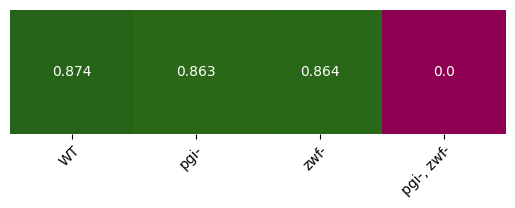

In [43]:
data = [growth_rates.keys(), growth_rates.values()]
arr = np.array([list(growth_rates.values())])
plt.imshow(arr, cmap="PiYG")

ax = plt.gca()

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(growth_rates)), labels=growth_rates.keys(),
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks([])

# Turn spines off and create white grid.
ax.spines[:].set_visible(False)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

# Loop over data dimensions and create text annotations.
for i in range(len(growth_rates.keys())):
    for j in range(1):
        text = ax.text(i, j, round(arr[j, i], 3),
                       ha="center", va="center", color="w")

plt.show()

## 7) Et si l'on intègre des données omiques ?

Reprenons la même expérience, mais au lieu d'utiliser de faire des "knock-out", supposons que nous avons des données omiques dans deux conditions.

Dans la première condition, C1, *zwf* est **sous-exprimé**. Les données de transcriptomiques et protéomiques valident cette hypothèse.

Dans la seconde condition, C2, *pgi* est **sous-exprimé**. Les données de transcriptomiques et protéomiques valident aussi cette hypothèse.

![img](https://raw.githubusercontent.com/maxm4/metabolic-modelling/refs/heads/main/img/expression.png)

L'enjeu ici est d'intégrer ces observations dans le modèle du métabolisme. Nous devons donc refléter cette donnée sur les bornes des flux des réactions.

La borne par défaut de toutes les réactions est (-1000.0, 1000.0) mais la borne d'EX_glc_e (-10.0, 0) force les valeurs de flux autour de l'intervalle [0.1, 10].

C1 et C2 se traduissent donc par des bornes (-1.0, 1.0) au lieu de (-1000.0, 1000.0) pour respectivement G6PDH et PGI.

En d'autres termes, au niveau du modèle, nous allons faire des *knock-down* au lieu de *knock-out*.

### a) Taux de croissance pour la bactérie *E. coli* wild type

In [44]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [45]:
fluxes = model.optimize()

In [46]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.8739215069684302

In [47]:
growth_rates = {}

In [48]:
growth_rates['WT'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

### b) Taux de croissance en condition C1 (*zwf* sous-exprimé)

In [49]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [50]:
model.reactions.get_by_id('G6PDH2r').bounds = (-1.0, 1.0) # set the bounds for condition C1

In [51]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [52]:
fluxes = model.optimize()

In [53]:
builder.reaction_data = fluxes.fluxes

In [54]:
builder

Builder(reaction_data={'PFK': 8.80540441961081, 'PFL': 0.0, 'PGI': 8.822500491960943, 'PGK': -17.3649742655923…

In [55]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.8658512587271099

In [56]:
growth_rates['C1'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

### c) Taux de croissance en condition C2 (*pgi* sous-exprimé)

In [57]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [58]:
model.reactions.get_by_id('PGI').bounds = (-1.0, 1.0) # set the bounds for condition C2

In [59]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [60]:
fluxes = model.optimize()

In [61]:
builder.reaction_data = fluxes.fluxes

In [62]:
builder

Builder(reaction_data={'PFK': 6.19834678545996, 'PFL': 0.0, 'PGI': 1.0, 'PGK': -14.758711341205911, 'PGL': 8.8…

In [63]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.8653735538915904

In [64]:
growth_rates['C2'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

### d) Taux de croissance en condition C1+C2 (*zwf* et *pgi* sous-exprimés)

In [65]:
model = cobra.io.read_sbml_model('e_coli_core.xml')

In [66]:
model.reactions.get_by_id('G6PDH2r').bounds = (-1.0, 1.0) # set the bounds for condition C1
model.reactions.get_by_id('PGI').bounds = (-1.0, 1.0) # set the bounds for condition C2

In [67]:
builder = Builder(
    map_name='e_coli_core.Core metabolism',
    model_name='e_coli_core',
)

In [68]:
fluxes = model.optimize()

In [69]:
builder.reaction_data = fluxes.fluxes

In [70]:
builder

Builder(reaction_data={'PFK': 1.5546713439501678, 'PFL': 0.0, 'PGI': 1.0, 'PGK': -3.3478125650286974, 'PGL': 1…

In [71]:
fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.14182008701595414

### e) En résumé

In [72]:
growth_rates['C1 + C2'] = fluxes.fluxes['BIOMASS_Ecoli_core_w_GAM']

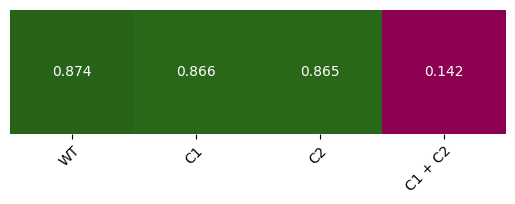

In [73]:
data = [growth_rates.keys(), growth_rates.values()]
arr = np.array([list(growth_rates.values())])
plt.imshow(arr, cmap="PiYG")

ax = plt.gca()

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(growth_rates)), labels=growth_rates.keys(),
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks([])

# Turn spines off and create white grid.
ax.spines[:].set_visible(False)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

# Loop over data dimensions and create text annotations.
for i in range(len(growth_rates.keys())):
    for j in range(1):
        text = ax.text(i, j, round(arr[j, i], 3),
                       ha="center", va="center", color="w")

plt.show()

## 8) Que se passe-t-il sur un plus grand modèle ?

Nous allons maintenant charger le modèle à l'échelle du génome de *E. coli* nommé iJO1366.

Il possède 1366 gènes, 2583 réactions, et 1805 métabolites.

In [436]:
!wget -nc http://bigg.ucsd.edu/static/models/iJO1366.xml

Fichier «iJO1366.xml» déjà présent ; pas de récupération.



In [437]:
model = cobra.io.read_sbml_model('iJO1366.xml')

In [438]:
model

Name,iJO1366
Memory address,7fc2bbb116f0
Number of metabolites,1805
Number of reactions,2583
Number of genes,1367
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [439]:
builder = Builder(
    map_json='iJO1366.Central metabolism.adapted.json',
    model_name='iJO1366',
)

In [440]:
fluxes = model.optimize()

In [441]:
builder.reaction_data = fluxes.fluxes

In [442]:
builder

Builder(reaction_data={'EX_cm_e': -0.0, 'EX_cmp_e': 0.0, 'EX_co2_e': 19.67522263566323, 'EX_cobalt2_e': -2.455…

### a) Récupérons le taux de croissance wild type

In [443]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.005113,0,0.00%
cl_e,EX_cl_e,0.005113,0,0.00%
cobalt2_e,EX_cobalt2_e,2.456E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006965,0,0.00%
fe2_e,EX_fe2_e,0.01578,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
k_e,EX_k_e,0.1918,0,0.00%
mg2_e,EX_mg2_e,0.008522,0,0.00%
mn2_e,EX_mn2_e,0.0006788,0,0.00%
mobd_e,EX_mobd_e,0.0001267,0,0.00%


In [444]:
growth_rates = {}

In [445]:
fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

0.9823718127269788

In [446]:
[(ex, ex.bounds) for ex in model.exchanges if ex.bounds[0] not in [0, -1000]]

[(<Reaction EX_glc__D_e at 0x7fc2ce759ed0>, (-10.0, 1000.0)),
 (<Reaction EX_cbl1_e at 0x7fc2ce798250>, (-0.01, 1000.0))]

In [447]:
fluxes.fluxes['EX_glc__D_e']

-10.0

Notons que la seule entrée de carbone qui semble être autorisée est le glucose.

Les entrées `cobra` sont toujours caractérisées par des valeurs de flux négatives pour les réactions dites "d'échange" (e.g: `EX_metabolite_e`).

In [448]:
growth_rates['glc'] = {}

In [449]:
growth_rates['glc']['WT'] = fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

### b) Quel est cette fois-ci le taux de croissance après knock-outs de *zwf* et *pgi* ?

On peut "knock-out" les réactions directement sans passer par leur gènes.

In [450]:
model.reactions.get_by_id('PGI').knock_out()

In [451]:
model.reactions.get_by_id('G6PDH2r').knock_out()

In [452]:
model.optimize()

,fluxes,reduced_costs
EX_cm_e,-0.000000,0.000000e+00
EX_cmp_e,0.000000,-2.957929e-01
EX_co2_e,20.370751,0.000000e+00
EX_cobalt2_e,-0.000024,0.000000e+00
DM_4crsol_c,0.000215,0.000000e+00
...,...,...
RNDR4,0.000000,-4.033540e-03
RNDR4b,0.000000,-4.033540e-03
RNTR1c2,0.025261,1.387779e-17
RNTR2c2,0.026083,1.387779e-17


In [453]:
fluxes = model.optimize()

In [454]:
fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

0.9654276947610319

In [455]:
growth_rates['glc']['pgi-, zwf-'] = fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

Cette fois-ci, pas de "solution infeasible". Que se passe-t-il ? Quelle est la différence ?

In [456]:
builder = Builder(
    map_json='iJO1366.Central metabolism.adapted.json',
    model_name='iJO1366',
)

In [457]:
builder.reaction_data = fluxes.fluxes

In [458]:
builder

Builder(reaction_data={'EX_cm_e': -0.0, 'EX_cmp_e': 0.0, 'EX_co2_e': 20.37075133035921, 'EX_cobalt2_e': -2.413…

On observe que le chemin emprunté utilise une nouvelle réaction qui n'était pas dans le modèle `core`: HEX7. 
    
Essayons de bloquer l'entrée de glucose afin de voir si le modèle s'adapte.

In [459]:
model = cobra.io.read_sbml_model('iJO1366.xml')

In [460]:
model.reactions.get_by_id('PGI').knock_out()

In [461]:
model.reactions.get_by_id('G6PDH2r').knock_out()

In [462]:
model.reactions.get_by_id('EX_glc__D_e').knock_out()

In [463]:
fluxes = model.optimize()

/home/maxime/anaconda3/envs/escher-viz/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


De nouveau "infeasible". Pourtant le modèle pourrait importer directement du fructose si on l'ajoutait dans son milieu.

Regardons le milieu de croissance du modèle.

In [464]:
[(ex, ex.bounds) for ex in model.exchanges if ex.bounds[0] not in [0]]

[(<Reaction EX_co2_e at 0x7fc2b05fadd0>, (-1000.0, 1000.0)),
 (<Reaction EX_cobalt2_e at 0x7fc2b05fafe0>, (-1000.0, 1000.0)),
 (<Reaction EX_h_e at 0x7fc2a576ed70>, (-1000.0, 1000.0)),
 (<Reaction EX_h2o_e at 0x7fc2a5770400>, (-1000.0, 1000.0)),
 (<Reaction EX_k_e at 0x7fc2a5771cc0>, (-1000.0, 1000.0)),
 (<Reaction EX_cu2_e at 0x7fc2a5773040>, (-1000.0, 1000.0)),
 (<Reaction EX_mg2_e at 0x7fc2a576a5c0>, (-1000.0, 1000.0)),
 (<Reaction EX_mn2_e at 0x7fc2a5769cc0>, (-1000.0, 1000.0)),
 (<Reaction EX_mobd_e at 0x7fc2a5769ba0>, (-1000.0, 1000.0)),
 (<Reaction EX_na1_e at 0x7fc2a57698d0>, (-1000.0, 1000.0)),
 (<Reaction EX_nh4_e at 0x7fc2a57697e0>, (-1000.0, 1000.0)),
 (<Reaction EX_ca2_e at 0x7fc2a5769510>, (-1000.0, 1000.0)),
 (<Reaction EX_cbl1_e at 0x7fc2a5769420>, (-0.01, 1000.0)),
 (<Reaction EX_ni2_e at 0x7fc2a57691e0>, (-1000.0, 1000.0)),
 (<Reaction EX_o2_e at 0x7fc2a5768bb0>, (-1000.0, 1000.0)),
 (<Reaction EX_cl_e at 0x7fc2a57685b0>, (-1000.0, 1000.0)),
 (<Reaction EX_pi_e at 0x7

L'entrée du fructose n'est pas permise par le modèle. Remplaçons l'entrée de glucose par une entrée de fructose.

### c) Croissance sur milieu de fructose - après knock-outs de *zwf* et *pgi*

In [465]:
model = cobra.io.read_sbml_model('iJO1366.xml')

In [466]:
model.reactions.get_by_id('EX_glc__D_e').bounds = (0, 1000.0)
model.reactions.get_by_id('EX_fru_e').bounds = (-10.0, 1000.0)

In [467]:
fluxes = model.optimize()

In [468]:
fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

0.9823718127269881

In [469]:
growth_rates['fru'] = {}
growth_rates['fru']['WT'] = fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

In [470]:
model.reactions.get_by_id('PGI').knock_out()
model.reactions.get_by_id('G6PDH2r').knock_out()

In [471]:
builder = Builder(
    map_json='iJO1366.Central metabolism.adapted.json',
    model_name='iJO1366',
)

In [472]:
fluxes = model.optimize()

In [473]:
builder.reaction_data = fluxes.fluxes

In [474]:
builder

Builder(reaction_data={'EX_cm_e': -0.0, 'EX_cmp_e': 0.0, 'EX_co2_e': 19.95682560788539, 'EX_cobalt2_e': -2.438…

In [475]:
fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

0.9755115436722572

In [476]:
growth_rates['fru']['pgi-, zwf-'] = fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

### d) Croissance sur milieu de fructose-6-P - après knock-outs de *zwf* et *pgi*

In [477]:
model = cobra.io.read_sbml_model('iJO1366.xml')

In [478]:
model.reactions.get_by_id('EX_glc__D_e').bounds = (0, 1000.0)
model.reactions.get_by_id('EX_f6p_e').bounds = (-10.0, 1000.0)

In [479]:
fluxes = model.optimize()

In [480]:
fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

1.0134792165498763

In [481]:
growth_rates['f6p'] = {}
growth_rates['f6p']['WT'] = fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

In [482]:
builder = Builder(
    map_json='iJO1366.Central metabolism.adapted.json',
    model_name='iJO1366',
)

In [483]:
builder.reaction_data = fluxes.fluxes

In [484]:
builder

Builder(reaction_data={'EX_cm_e': -0.0, 'EX_cmp_e': 0.0, 'EX_co2_e': 18.398313916083275, 'EX_cobalt2_e': -2.53…

In [485]:
model.reactions.get_by_id('PGI').knock_out()
model.reactions.get_by_id('G6PDH2r').knock_out()

In [486]:
fluxes = model.optimize()

In [487]:
fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

1.0057630904059476

In [488]:
growth_rates['f6p']['pgi-, zwf-'] = fluxes.fluxes['BIOMASS_Ec_iJO1366_core_53p95M']

## e) En résumé

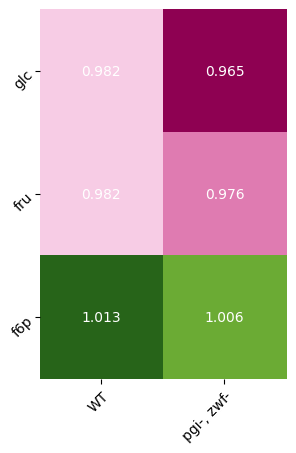

In [489]:
data = [growth_rates.keys(), growth_rates.values()]
arr = np.array([list(v.values()) for gr, v in growth_rates.items()])
plt.imshow(arr, cmap="PiYG")

ax = plt.gca()

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(growth_rates['glc'])), labels=growth_rates['glc'].keys(),
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(growth_rates)), labels=growth_rates.keys(),
              rotation=45, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
ax.spines[:].set_visible(False)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)

# Loop over data dimensions and create text annotations.
for i in range(len(growth_rates.keys())):
    for j in range(len(growth_rates['glc'].keys())):
        text = ax.text(j, i, round(arr[i,j], 3),
                       ha="center", va="center", color="w")

plt.show()

In [490]:
growth_rates

{'glc': {'WT': 0.9823718127269788, 'pgi-, zwf-': 0.9654276947610319},
 'fru': {'WT': 0.9823718127269881, 'pgi-, zwf-': 0.9755115436722572},
 'f6p': {'WT': 1.0134792165498763, 'pgi-, zwf-': 1.0057630904059476}}